In [12]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import os
os.listdir('../input')

['dt.pkl',
 'funda_train.csv',
 'index_1007.doc',
 'submission.csv',
 'train2.pkl',
 '시군구_인구.csv',
 '시도별_인구밀도.csv']

In [45]:
path = '../input/'
dt = pd.read_pickle(path + 'dt.pkl')
train = pd.read_pickle(path + 'train2.pkl')

print('dt shape', dt.shape)
print('train shape', train.shape)

dt shape (66133, 10)
train shape (6556613, 24)


In [4]:
dt.head()

,store_id,date_block_1,amount,cc_nunique_store,cc_mode_store,cc_nunique_store_date,cc_mode_store_date,month_days,region_label,Seoul
0,0,1,7.470000e+05,7,0.0,7.0,0.0,30.0,-1,0
1,0,2,1.005000e+06,7,0.0,7.0,0.0,31.0,-1,0
2,0,3,8.715714e+05,7,0.0,7.0,0.0,31.0,-1,0
3,0,4,8.978571e+05,7,0.0,7.0,0.0,30.0,-1,0
4,0,5,8.354286e+05,7,0.0,7.0,0.0,31.0,-1,0


In [5]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days,region_label,Seoul
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30,-1.0,0
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30,-1.0,0
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30,-1.0,0
3,0,3,0,2016-06-01,20:22:00,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN,1,1,30,-1.0,0
4,0,4,2,2016-06-02,11:06:00,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN,1,1,30,-1.0,0


# city

In [9]:
from sklearn.preprocessing import LabelEncoder

In [6]:
train.city1.value_counts()

경기    968836
서울    704437
경남    406190
부산    359042
경북    262338
충북    239796
충남    217040
대구    208424
인천    192439
강원    169791
전북    143514
대전    142478
울산    124640
전남    121978
광주    118015
제주    114671
세종     20218
Name: city1, dtype: int64

In [46]:
train['city1_label'] = np.nan
train.loc[train.city1.isnull(), 'city1_label'] = -1

le = LabelEncoder()
train.loc[~train.city1.isnull(), 'city1_label'] = le.fit_transform(train.loc[~train.city1.isnull(), 'city1'])
len(train.city1_label.unique())

18

## new_data

In [14]:
os.listdir(path)

['dt.pkl',
 'funda_train.csv',
 'index_1007.doc',
 'submission.csv',
 'train2.pkl',
 '시군구_인구.csv',
 '시도별_인구밀도.csv']

In [43]:
people = pd.read_csv(path + '시군구_인구.csv')
people_density = pd.read_csv(path + '시도별_인구밀도.csv')

In [44]:
people_density.인구 = people_density.인구.apply(int)
people_density.인구밀도 = people_density.인구밀도.apply(int)
people.인구 = people.인구.apply(int)

In [47]:
train = pd.merge(train, people, how = 'left', left_on= 'city2', right_on='행정구역')
train.drop('행정구역', axis = 1, inplace = True)
train.rename(columns = {'인구' : 'people'}, inplace = True)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days,region_label,Seoul,city1_label,people
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN
3,0,3,0,2016-06-01,20:22:00,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN
4,0,4,2,2016-06-02,11:06:00,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN


In [48]:
train = pd.merge(train, people_density, how = 'left', left_on= 'city1', right_on='지역')
train.drop('지역', axis = 1, inplace = True)
train.rename(columns = {'인구' : 'people_city1', '인구밀도' : 'people_density_city1'}, inplace = True)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute,point_use,installment,business_type1,city1,city2,date_block_1,date_block_3,days,region_label,Seoul,city1_label,people,people_city1,people_density_city1
0,0,0,1,2016-06-01,13:13:00,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN,NaN,NaN
1,0,1,7,2016-06-01,18:12:00,0,NaN,기타 미용업,857.142857,2016,6,1,18,12,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN,NaN,NaN
2,0,2,2,2016-06-01,18:52:00,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN,NaN,NaN
3,0,3,0,2016-06-01,20:22:00,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN,NaN,NaN
4,0,4,2,2016-06-02,11:06:00,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6,0,0,미용업,NaN,NaN,1,1,30,-1.0,0,-1.0,NaN,NaN,NaN


In [53]:
aa = train.groupby('store_id')['people','people_city1', 'people_density_city1'].mean().reset_index()
dt = pd.merge(dt, aa, how = 'left')

In [54]:
#dt.to_pickle(path + 'dt.pkl')
#train.to_pickle(path + 'train2.pkl')

# train test split

In [55]:
X_train = dt[dt.date_block_1 <= 30].drop('amount', axis = 1)
y_train = dt.loc[dt.date_block_1 <= 30, 'amount']

X_valid = dt[(dt.date_block_1 > 30) & (dt.date_block_1 <= 33)].drop('amount', axis = 1)
y_valid = dt.loc[(dt.date_block_1 > 30) & (dt.date_block_1 <= 33), 'amount']

X_test = dt[dt.date_block_1 > 33].drop('amount', axis = 1)

print('train data shape : ', X_train.shape, y_train.shape)
print('valid data shape : ', X_valid.shape, y_valid.shape)
print('test data shape : ', X_test.shape)

train data shape :  (54446, 12) (54446,)
valid data shape :  (5786, 12) (5786,)
test data shape :  (5901, 12)


In [56]:
import gc
gc.collect()

326

In [60]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(njobs = -1, n_estimators=1000)

In [61]:
lgb.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_valid, y_valid)],
       verbose = 20, early_stopping_rounds=20)

Training until validation scores don't improve for 20 rounds.
[20]	training's l1: 743101	training's l2: 1.8951e+12	valid_1's l1: 750606	valid_1's l2: 2.00177e+12
[40]	training's l1: 688958	training's l2: 1.68172e+12	valid_1's l1: 700774	valid_1's l2: 1.841e+12
[60]	training's l1: 652879	training's l2: 1.56036e+12	valid_1's l1: 670092	valid_1's l2: 1.75567e+12
[80]	training's l1: 630401	training's l2: 1.4865e+12	valid_1's l1: 652814	valid_1's l2: 1.71448e+12
[100]	training's l1: 612581	training's l2: 1.43493e+12	valid_1's l1: 640181	valid_1's l2: 1.68002e+12
[120]	training's l1: 592692	training's l2: 1.38346e+12	valid_1's l1: 623888	valid_1's l2: 1.64265e+12
[140]	training's l1: 577565	training's l2: 1.34128e+12	valid_1's l1: 610473	valid_1's l2: 1.61286e+12
[160]	training's l1: 564838	training's l2: 1.30894e+12	valid_1's l1: 600502	valid_1's l2: 1.58868e+12
[180]	training's l1: 552405	training's l2: 1.27875e+12	valid_1's l1: 590566	valid_1's l2: 1.56529e+12
[200]	training's l1: 544937	

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, njobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

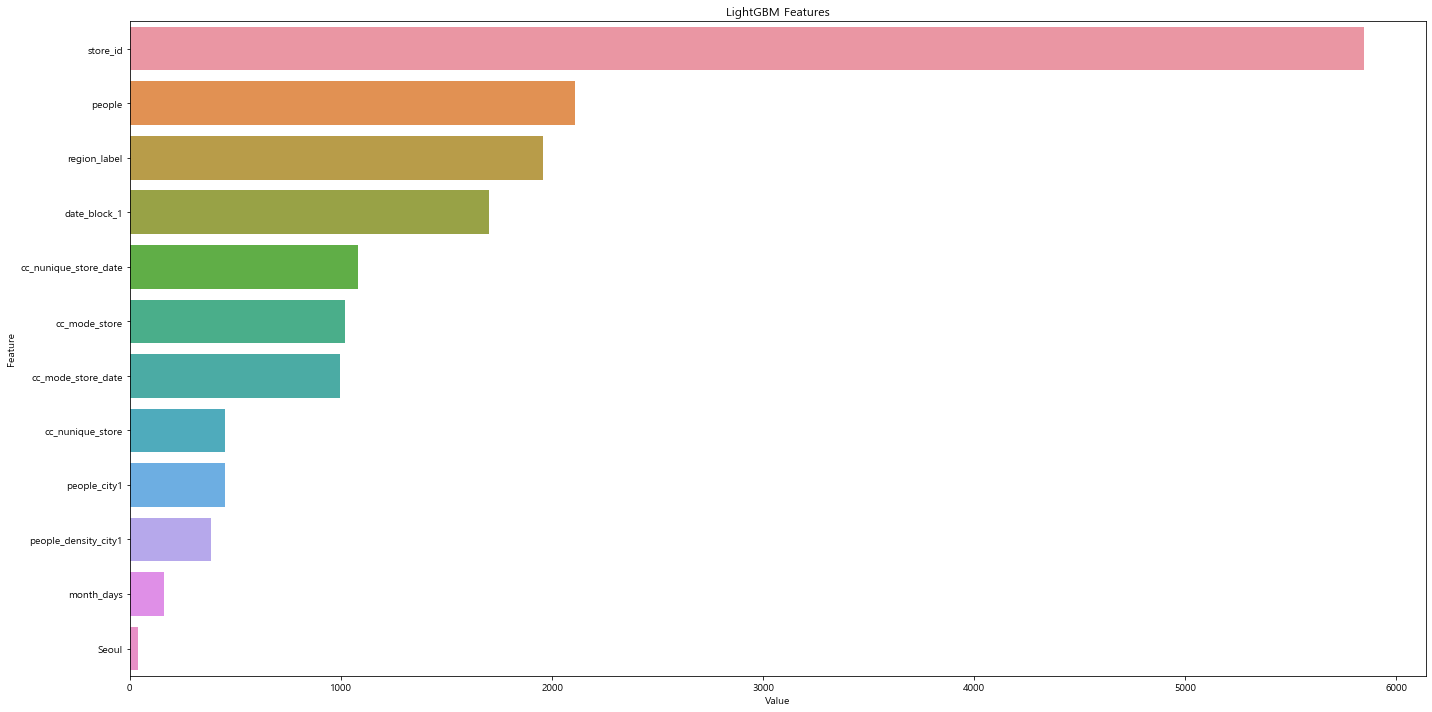

In [62]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

# submission

In [63]:
sub = pd.read_csv(path + 'submission.csv')
sub.head()

,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0


In [65]:
lgb_sub = X_test[['store_id', 'date_block_1']].reset_index(drop = True)
lgb_sub['amount'] = lgb.predict(X_test)

lgb_sub = lgb_sub.groupby('store_id')['amount'].sum().to_frame()
lgb_sub['amount'] = np.round(lgb_sub['amount'], 6)
print('sub shape', sub.shape)
print('lgb_sub shape', lgb_sub.shape)

sub shape (1967, 2)
lgb_sub shape (1967, 1)


In [66]:
#lgb_sub.to_csv('../sub/20190813_lgb_simple.csv') - 2594634.114990